<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [124]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [125]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n, d, 0)
RGER = nx.gnm_random_graph(n, M) 
RG_Gil = nx.gnp_random_graph(n, p)
RGG = nx.random_geometric_graph(n, R)
SF = nx.barabasi_albert_graph(n, d) 
SW = nx.watts_strogatz_graph(n, d, p)

<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

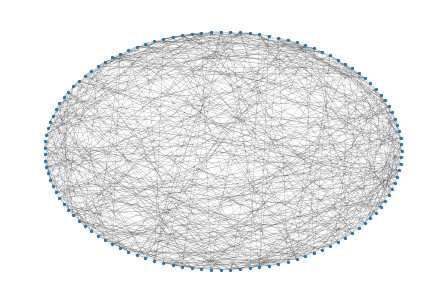

In [126]:
#football network
football=nx.read_gml(r"football.gml")
nx.draw_circular(football, node_size=5, width=0.1)

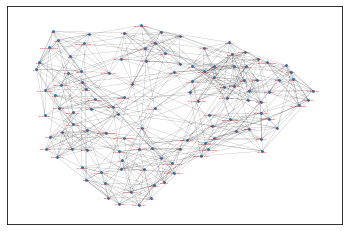

In [127]:
nx.draw_networkx(football, node_size=3, width=0.1, font_size=2, font_color='r')

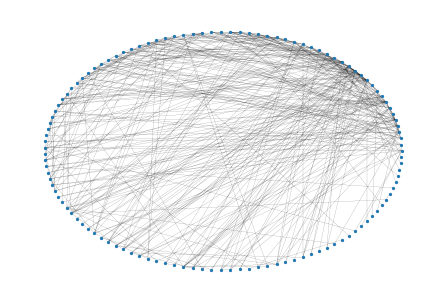

In [128]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1
        
nx.draw_circular(got, node_size=5, width=0.1)

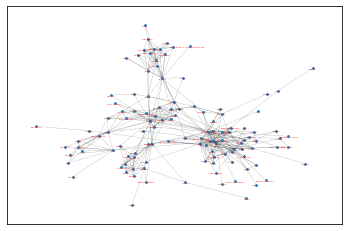

In [129]:
nx.draw_networkx(got, node_size=3, width=0.1, font_size=2, font_color='r')

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.


 Graph with 986 nodes and 16064 edges


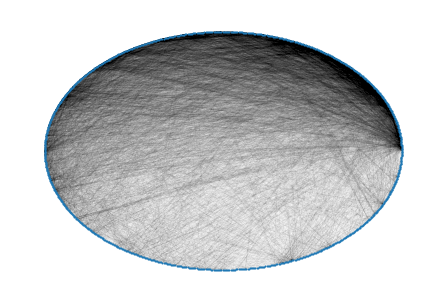

In [130]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt", create_using=nx.Graph())
eu.remove_edges_from(nx.selfloop_edges(eu))

communities = nx.connected_components(eu)
node_groups = []
for com in communities:
    node_groups.append(list(com))

sorted_comm = sorted(node_groups, key=len, reverse=True)
conn_graph = eu.subgraph(sorted_comm[0])
print("\n", conn_graph)

nx.draw_circular(conn_graph, node_size=1, width=0.01)

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

Regular


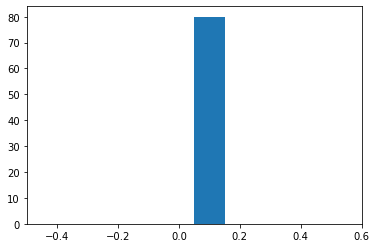

Average degree is 0.05063291139240507 

RGER


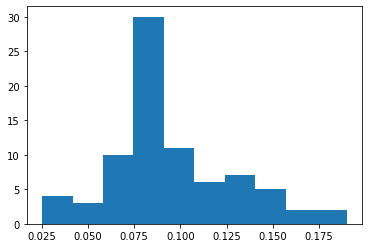

Average degree is 0.0949367088607595 

RG Gilbert


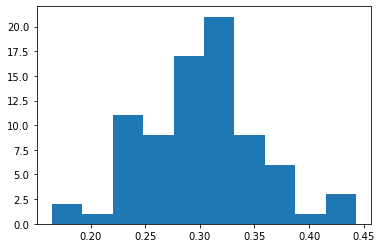

Average degree is 0.29873417721518986 

RGG


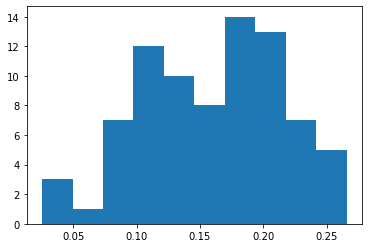

Average degree is 0.16044303797468354 

Scale Free


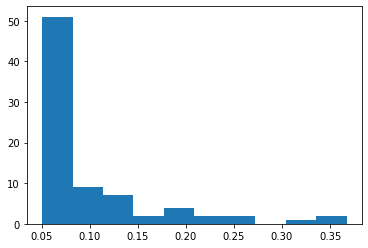

Average degree is 0.09620253164556962 

Small World


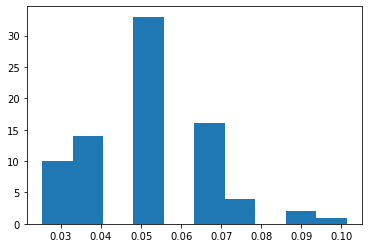

Average degree is 0.05063291139240507 

Football


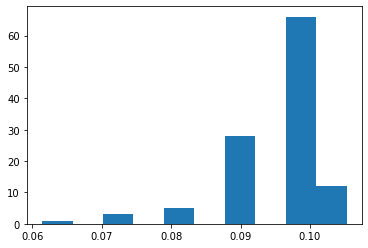

Average degree is 0.0935163996948894 

Game of Thrones


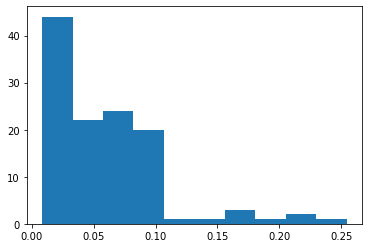

Average degree is 0.05640222190571145 

EU-Core


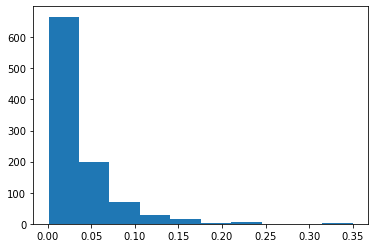

Average degree is 0.033080384262929745 



In [131]:
def find_degree(G, name):
    print(name)
    degree_centrality = nx.degree_centrality(G) # vazoume to degree_centrality kai oxi to degree gt to prwto einai normalized
    avg_degree = np.mean(list(degree_centrality.values()))
    plt.hist(degree_centrality.values())
    plt.show()
    print("Average degree is", avg_degree, "\n")

find_degree(REG, "Regular")
find_degree(RGER, "RGER")
find_degree(RG_Gil, "RG Gilbert")
find_degree(RGG, "RGG")
find_degree(SF, "Scale Free")
find_degree(SW, "Small World")

find_degree(football, "Football")
find_degree(got, "Game of Thrones")
find_degree(conn_graph, "EU-Core")

# ta got kai eu-core moiazoun me sf sto degree
# to football me random pou teinei pros to regular

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

REG


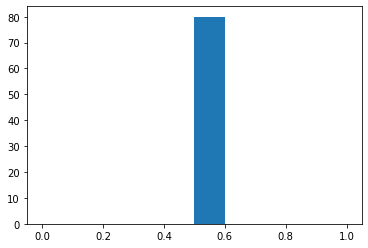

Average clustering 0.5 

RGER


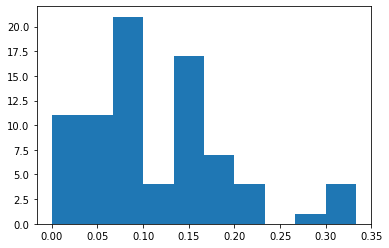

Average clustering 0.10780871905871905 

RG Gilbert


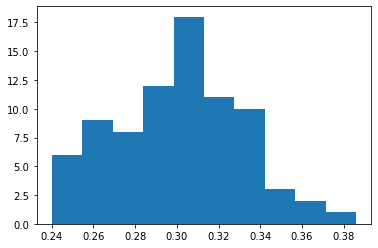

Average clustering 0.3017833552566132 

RGG


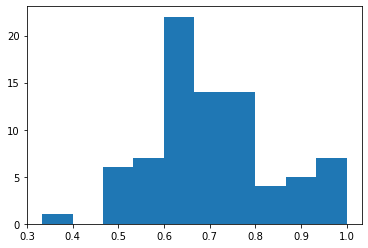

Average clustering 0.7018757737575463 

Scale Free


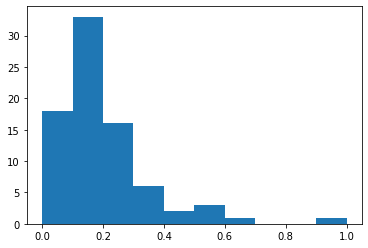

Average clustering 0.18632986349112374 

Small World


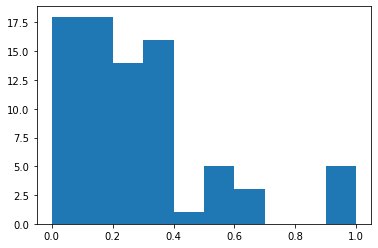

Average clustering 0.2727083333333333 

Football


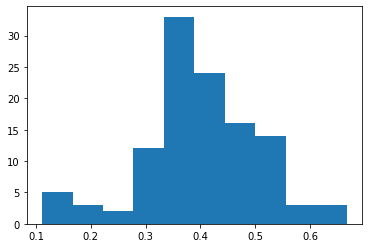

Average clustering 0.40321601104209803 

Got


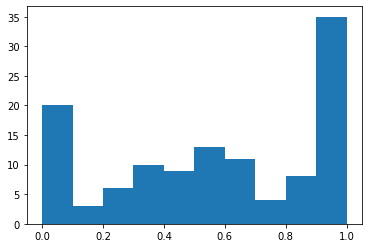

Average clustering 0.5744036387164707 

Eu-Core


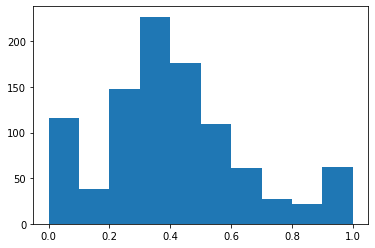

Average clustering 0.4070504475195386 



In [132]:
def find_clustering(G, name):
    print(name)
    coeff_clust = nx.clustering(G)
    avg_coeff = np.mean(list(coeff_clust.values()))
    plt.hist(coeff_clust.values())
    plt.show()
    print("Average clustering", avg_coeff, "\n")

    
find_clustering(REG, "REG")
find_clustering(RGER, "RGER")
find_clustering(RG_Gil, "RG Gilbert")
find_clustering(RGG, "RGG")
find_clustering(SF, "Scale Free")
find_clustering(SW, "Small World")

find_clustering(football, "Football")
find_clustering(got, "Got")
find_clustering(conn_graph, "Eu-Core")

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

Regular


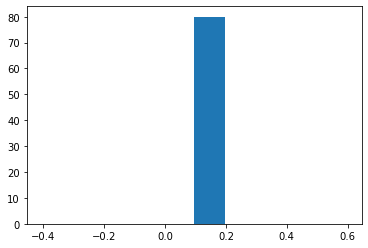

Average closeness is 0.09634146341463413 

RGER


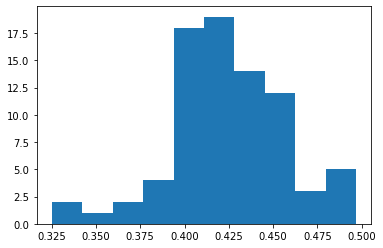

Average closeness is 0.42475897842852933 

RG-Gilbert


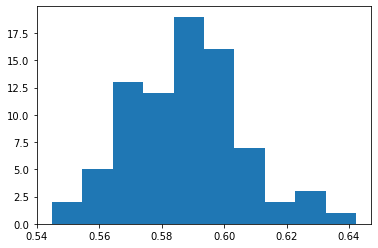

Average closeness is 0.5883685493808904 

RGG


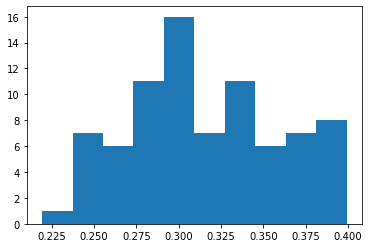

Average closeness is 0.3155088102129478 

Scale Free


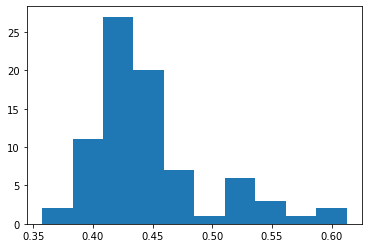

Average closeness is 0.44622827261966586 

Small World


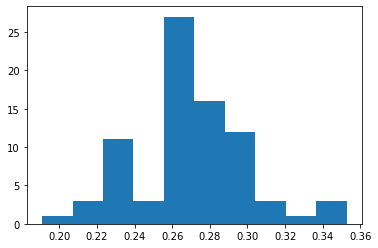

Average closeness is 0.2690660686027756 

Football


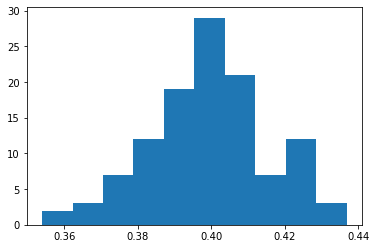

Average closeness is 0.39931907825186225 

Game of Thrones


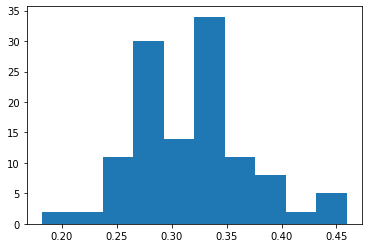

Average closeness is 0.31905170483140755 

EU-Core


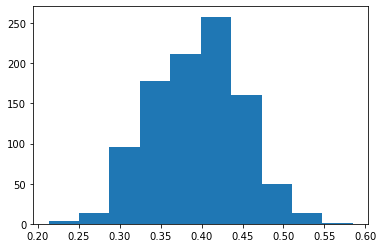

Average closeness is 0.39446404120869627 



In [133]:
def find_closeness(G, name):
    print(name)
    closeness = nx.closeness_centrality(G)
    avg_closeness = np.mean(list(closeness.values()))
    plt.hist(closeness.values())
    plt.show()
    print("Average closeness is", avg_closeness, '\n')

    
find_closeness(REG, "Regular")
find_closeness(RGER, "RGER")
find_closeness(RG_Gil, "RG-Gilbert")
find_closeness(RGG, "RGG")
find_closeness(SF, "Scale Free")
find_closeness(SW, "Small World")

find_closeness(football, "Football")
find_closeness(got, "Game of Thrones")
find_closeness(conn_graph, "EU-Core")

# oi pragmatikes moiazoun me small world sto closeness
# kapws guassian distribution

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [134]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [135]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [136]:
import itertools
from tqdm import tqdm

comms_newman_girvan_mod = []
comms_newman_girvan_perf = []

def newman_girvan(G, name):
    print(name)
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    k = 50
    limited = tqdm(itertools.takewhile(lambda c: len(c) <= k, comp))
    comms = []
    for communities in limited:
        comms.append(tuple(sorted(c) for c in communities))
    modularities = []
    performances = []
    for comm in comms:
        modularities.append(nx.algorithms.community.quality.modularity(G, comm))
        performances.append(nx.algorithms.community.quality.partition_quality(G, comm))
    for i in range(0, len(comms)):
        modularities[i] = (nx.algorithms.community.quality.modularity(G, comms[i]))
        performances[i] = (nx.algorithms.community.quality.partition_quality(G, comms[i]))
    max_mod = max(modularities)
    max_perf = max(performances)
    max_mod_indeces = [i for i, j in enumerate(modularities) if j == max_mod]
    max_perf_indeces = [i for i, j in enumerate(performances) if j == max_perf]
    for index in max_mod_indeces:
        print("Max modularity is", modularities[index])
        #print("Its partition is", comms[index], "\n")
        comms_newman_girvan_mod.append(comms[index])
    for index in max_perf_indeces:
        print("Max performance is", performances[index])
        #print("Its partition is", comms[index], "\n")
        comms_newman_girvan_perf.append(comms[index])
    print("======================================================")
   
    
newman_girvan(REG, "Regular")
newman_girvan(RGER, "RGER")
newman_girvan(RG_Gil, "RG-Gilbert")
newman_girvan(RGG, "RGG")
newman_girvan(SF, "Scale Free")
newman_girvan(SW, "Small World")

newman_girvan(football, "Football")
newman_girvan(got, "Game of Thrones")
newman_girvan(conn_graph, "EU-Core")


Regular


49it [00:00, 56.51it/s]


Max modularity is 0.7249999999999999
Max performance is (0.9625, 0.5531645569620253)
RGER


49it [00:05,  9.18it/s]


Max modularity is 0.2237111111111111
Max performance is (0.9833333333333333, 0.16487341772151898)
RG-Gilbert


49it [00:33,  1.46it/s]


Max modularity is 0.028617966281241018
Max performance is (0.986228813559322, 0.31550632911392407)
RGG


49it [00:05,  9.30it/s]


Max modularity is 0.5355165746608624
Max performance is (0.9625246548323472, 0.6164556962025316)
Scale Free


49it [00:05,  8.68it/s]


Max modularity is 0.11876731301939066
Max performance is (0.9769736842105263, 0.14113924050632912)
Small World


49it [00:01, 39.14it/s]


Max modularity is 0.60330078125
Max performance is (0.9125, 0.5164556962025316)
Football


49it [00:13,  3.52it/s]


Max modularity is 0.5996290274077957
Max performance is (0.9004893964110929, 0.5792524790236461)
Game of Thrones


49it [00:05,  9.47it/s]


Max modularity is 0.6681205999387817
Max performance is (0.9747474747474747, 0.47229739353368466)
EU-Core


49it [19:13, 23.54s/it]


Max modularity is 0.0006218821799455388
Max performance is (0.9995019920318725, 0.04515604246249524)


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [137]:
from tqdm import tqdm

comms_spectral_max_mod = []
comms_spectral_max_perf = []

def spectre007(G, name):
    print(name)
    n_nodes = G.number_of_nodes()
    modularity_vector = []
    performance_vector = []
    spectral_n_cluster = []
    adj_matrix = np.array(nx.to_numpy_matrix(G))
    k = 50
    for n_cluster in range(2, k+1):
        clustering = SpectralClustering(n_cluster, affinity='precomputed').fit(adj_matrix)
        list_of_clusters = [] 
        for i in range(0, n_cluster):
            list_of_clusters.append([])
        for i in range(0, n_nodes):
            list_of_clusters[clustering.labels_[i]].append(i) 
        spectral_n_cluster.append(list_of_clusters)
        modularity = nx.algorithms.community.quality.modularity(G, list_of_clusters)
        modularity_vector.append(modularity)
        performance = nx.algorithms.community.quality.partition_quality(G, list_of_clusters)
        performance_vector.append(performance)
    max_modularity = max(modularity_vector)
    max_mod_indeces = [i for i, j in enumerate(modularity_vector) if j == max_modularity]
    print("Max modularity is", max_modularity)
    #print("Its partition is:", spectral_n_cluster[max_mod_indeces[0]], "\n")
    comms_spectral_max_mod.append(spectral_n_cluster[max_mod_indeces[0]])
    max_performance = max(performance_vector)
    max_performance_indeces = [i for i, j in enumerate(performance_vector) if j == max_performance]
    print("Max performance is", max_performance)
    #print("Its partition is", spectral_n_cluster[max_performance_indeces[0]])
    comms_spectral_max_perf.append(spectral_n_cluster[max_performance_indeces[0]])
    print("==================================================")

    
spectre007(REG, "Regular")
spectre007(RGER, "RGER")
spectre007(RG_Gil, "RG-Gilbert")
spectre007(RGG, "RGG")
spectre007(SF, "Scale Free")
spectre007(SW, "Small World")

football_int = conv2int(football, 0)[0]
spectre007(football_int, "Football")
football_mapping = conv2int(football, 0)[1]
spectre007(conv2int(got, 0)[0], "Game of Thrones")
got_mapping = conv2int(got, 0)[1]
spectre007(conv2int(conn_graph, 0)[0], "EU-Core")
eu_mapping = conv2int(conn_graph, 0)[1]

Regular
Max modularity is 0.725
Max performance is (0.9625, 0.5531645569620253)
RGER
Max modularity is 0.28145
Max performance is (0.9766666666666667, 0.18670886075949367)
RG-Gilbert
Max modularity is 0.11370037794455615
Max performance is (0.6122881355932204, 0.5531645569620253)
RGG
Max modularity is 0.5703620710448203
Max performance is (0.9644970414201184, 0.6237341772151899)
Scale Free
Max modularity is 0.24464919494459833
Max performance is (0.6842105263157895, 0.5161392405063291)
Small World
Max modularity is 0.6052734375000001
Max performance is (0.89375, 0.48417721518987344)
Football
Max modularity is 0.6022010863056823
Max performance is (0.8727569331158238, 0.5676582761250953)
Game of Thrones
Max modularity is 0.665416794204673
Max performance is (0.9747474747474747, 0.47229739353368466)
EU-Core
Max modularity is 0.36447316436445454
Max performance is (0.9610931274900398, 0.18653432316388835)


In [138]:
#print(comms_spectral_max_mod[6])
#print("==============================")
#print(football_mapping)
#print(football_mapping[1])

football_spectral_max_mod_conv = [] 
for i in range(0, len(comms_spectral_max_mod[6])):
    football_spectral_max_mod_conv.append([])

for sublist in comms_spectral_max_mod[6]:
    for num in sublist:
        tmp_mapping = football_mapping[num]

for i in range(0, len(comms_spectral_max_mod[6])):
    for num in comms_spectral_max_mod[6][i]:
        tmp_mapping = football_mapping[num]
        football_spectral_max_mod_conv[i].append(tmp_mapping)

#print(football_spectral_max_mod_conv)
##################################################
#print(comms_spectral_max_mod[7])
#print("====================")
#print(got_mapping)
got_spectral_max_mod_conv = [] 
for i in range(0, len(comms_spectral_max_mod[7])):
    got_spectral_max_mod_conv.append([])

for sublist in comms_spectral_max_mod[7]:
    for num in sublist:
        tmp_mapping = got_mapping[num]

for i in range(0, len(comms_spectral_max_mod[7])):
    for num in comms_spectral_max_mod[7][i]:
        tmp_mapping = got_mapping[num]
        got_spectral_max_mod_conv[i].append(tmp_mapping)

#print(got_spectral_max_mod_conv)
################################################################
#print(comms_spectral_max_mod[8])
#print("====================")
#print(eu_mapping)
eu_spectral_max_mod_conv = []
for i in range(0, len(comms_spectral_max_mod[8])):
    eu_spectral_max_mod_conv.append([])

for sublist in comms_spectral_max_mod[8]:
    for num in sublist:
        tmp_mapping = eu_mapping[num]

for i in range(0, len(comms_spectral_max_mod[8])):
    for num in comms_spectral_max_mod[8][i]:
        tmp_mapping = eu_mapping[num]
        eu_spectral_max_mod_conv[i].append(tmp_mapping)

#print(eu_spectral_max_mod_conv)

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [139]:
comms_mod_max = []

def mod_max(G, name):
    print(name)
    k = 50
    comms_mod_max.append(nx.algorithms.community.modularity_max.greedy_modularity_communities(G, k))
    tmp_comms = comms_mod_max[len(comms_mod_max)-1]
    #print(tmp_comms)
    modul = nx.algorithms.community.quality.modularity(G, tmp_comms)
    print("Max modularity is", modul)
    q_p = nx.algorithms.community.quality.partition_quality(G, tmp_comms)
    print("Max performance is", q_p)
    print("================================")
    
    
mod_max(REG, "Regular")
mod_max(RGER, "RGER")
mod_max(RG_Gil, "RG-Gilbert")
mod_max(RGG, "RGG")
mod_max(SF, "Scale Free")
mod_max(SW, "Small World")

mod_max(football, "Football")
mod_max(got, "Game of Thrones")
mod_max(conn_graph, "EU-Core")

Regular
Max modularity is 0.673125
Max performance is (0.925, 0.8006329113924051)
RGER
Max modularity is 0.29625
Max performance is (0.4666666666666667, 0.8354430379746836)
RG-Gilbert
Max modularity is 0.12394292229244472
Max performance is (0.4724576271186441, 0.6395569620253164)
RGG
Max modularity is 0.5390489750981331
Max performance is (0.8777120315581854, 0.835126582278481)
Scale Free
Max modularity is 0.28176939058171746
Max performance is (0.48355263157894735, 0.8056962025316455)
Small World
Max modularity is 0.5870898437499998
Max performance is (0.725, 0.9006329113924051)
Football
Max modularity is 0.5564043335134086
Max performance is (0.7389885807504079, 0.8684973302822273)
Game of Thrones
Max modularity is 0.660477884909703
Max performance is (0.8787878787878788, 0.829796325309785)
EU-Core
Max modularity is 0.3471325650460906
Max performance is (0.6848232071713147, 0.7078716240565892)


In [140]:
def print_comm(G, name):
    if name == "REG":
        index = 0
    elif name == "RGER":
        index = 1
    elif name == "RG_Gil":
        index = 2
    elif name == "RGG":
        index = 3
    elif name == "SF":
        index = 4
    elif name == "SW":
        index = 5
    elif name == "Football":
        index = 6
    elif name == "GOT":
        index = 7
    elif name == "EU-Core":
        index = 8
    else:
        print("error")
    for i in range(3):
        plt.figure()
        pos = nx.spring_layout(G)
        nx.draw(G, pos, edge_color='k', with_labels=True, font_weight='light', node_size=50, width=0.2)
        if i == 0:
            tmp_comms = comms_newman_girvan_mod[index]
            plt.title("NEWMAN GIRVAN")
        elif i == 1:
            if G == football:
                tmp_comms = football_spectral_max_mod_conv
            elif G == got:
                tmp_comms = got_spectral_max_mod_conv
            elif G == conn_graph:
                tmp_comms = eu_spectral_max_mod_conv
            else:
                tmp_comms = comms_spectral_max_mod[index]
            plt.title("SPECTRAL CLUSTERING")
        elif i == 2:
            tmp_comms = comms_mod_max[index]
            plt.title("GREEDY MOD MAX")
        else:
            print("wtf")
        for i in range(len(tmp_comms)):
            nx.draw_networkx_nodes(G, pos, nodelist=tmp_comms[i], node_color=colors[i])

#### Οπτικοποίηση κοινοτήτων American College Football

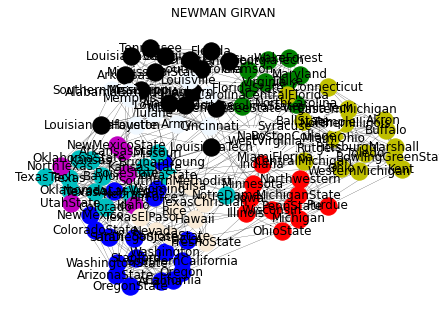

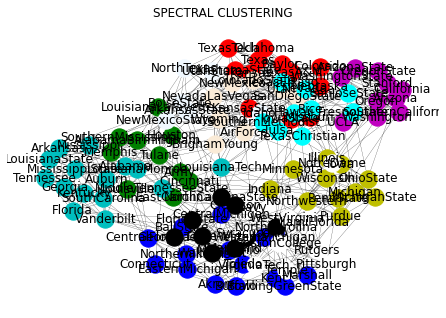

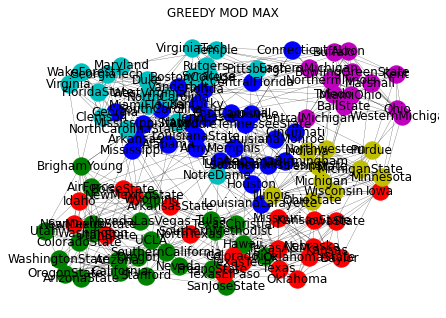

In [141]:
print_comm(football, "Football")

#### Οπτικοποίηση κοινοτήτων Game of Thrones

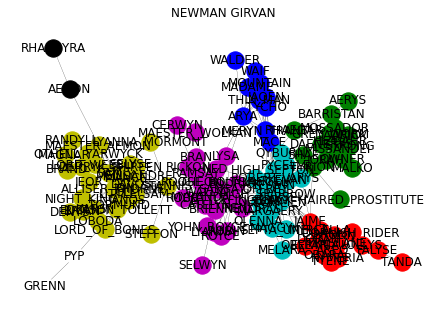

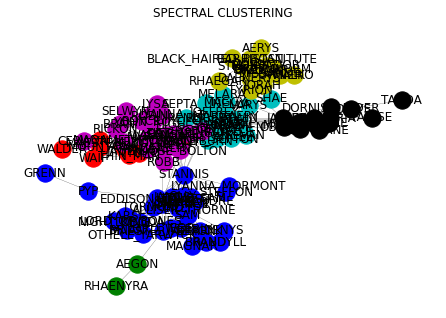

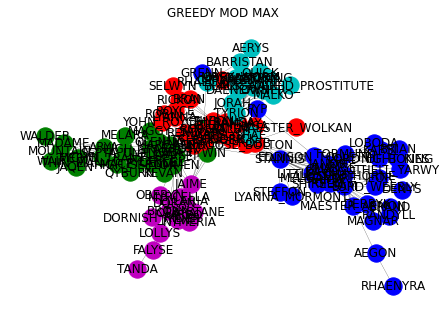

In [142]:
print_comm(got, "GOT") 

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

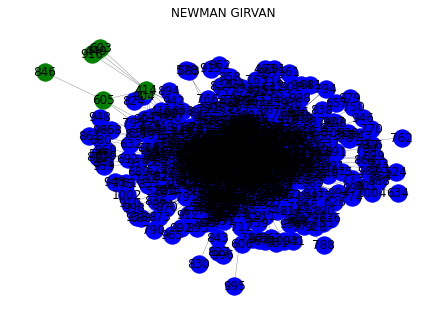

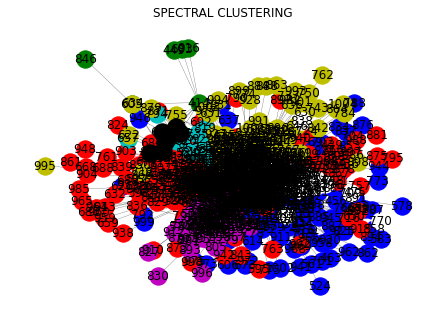

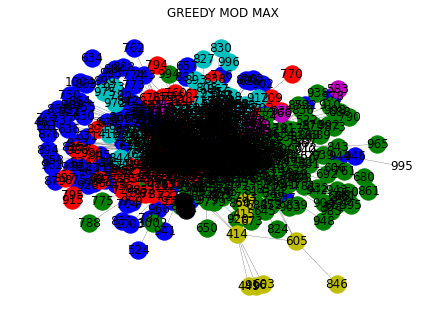

In [143]:
print_comm(conn_graph, "EU-Core") 

#### Οπτικοποίηση κοινοτήτων REG

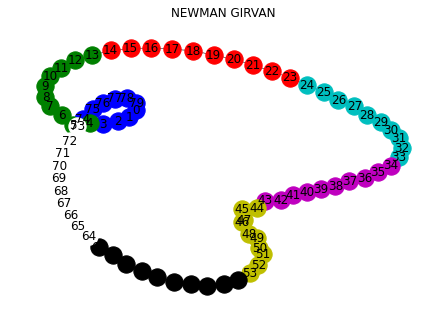

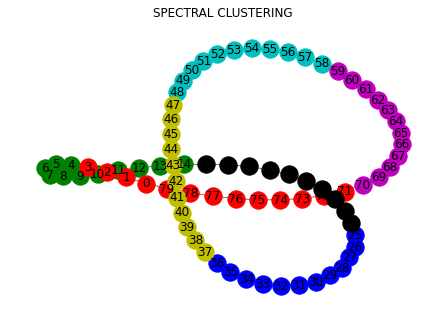

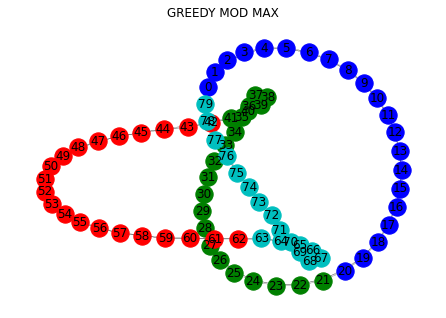

In [144]:
print_comm(REG, "REG")

#### Οπτικοποίηση κοινοτήτων RGER

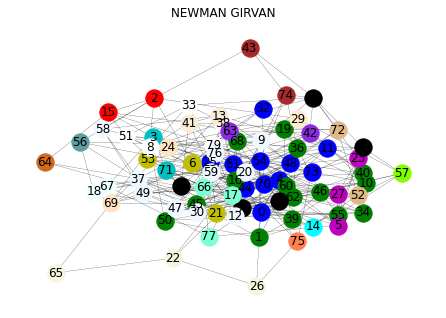

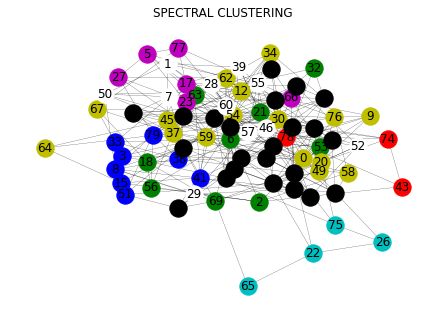

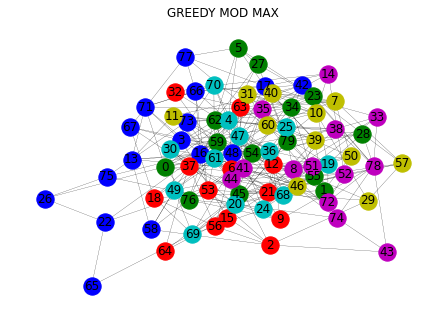

In [145]:
print_comm(RGER, "RGER")

#### Οπτικοποίηση κοινοτήτων RGG

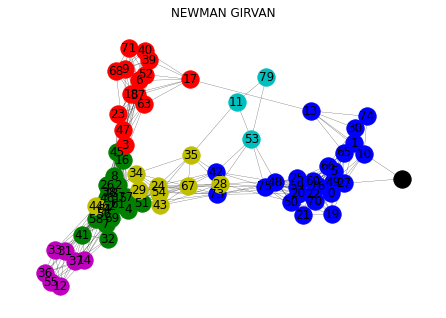

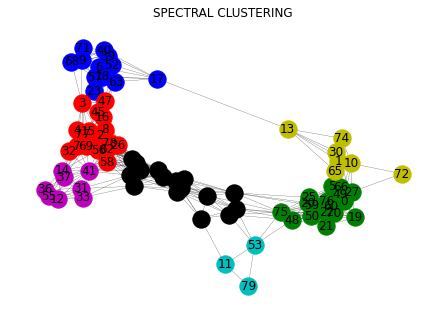

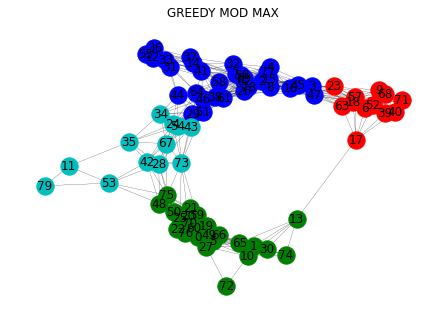

In [146]:
print_comm(RGG, "RGG")

#### Οπτικοποίηση κοινοτήτων SW

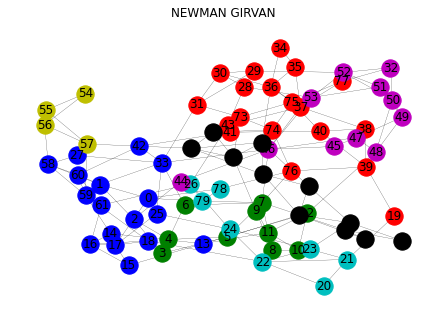

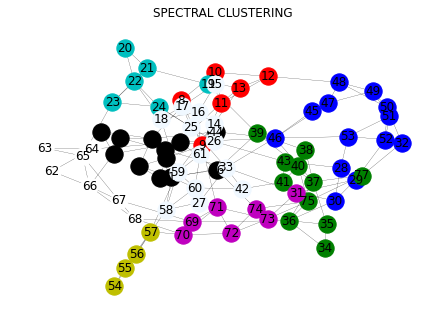

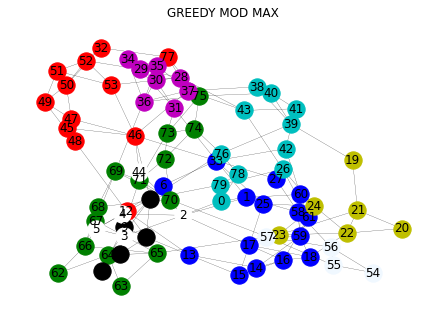

In [147]:
print_comm(SW, "SW")

#### Οπτικοποίηση κοινοτήτων SF

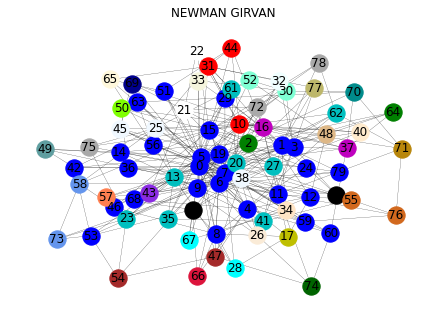

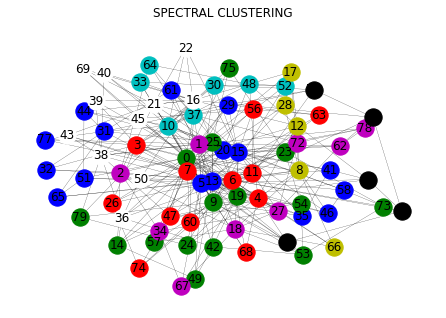

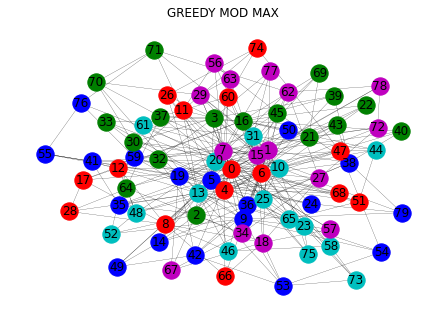

In [148]:
print_comm(SF, "SF")